
<h1 align="center">SOCIAL NETWORK CHAT'S ANALYSIS</h1>

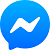

## We imported all the packeges we need for our project

In [8]:
import json
import datetime
from datetime import datetime
from pytz import timezone
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import random

## We need a function, that will convert armenian letters to english 

In [9]:
def arm_eng(text):
    '''
    Parameters:
        text -> text
    Returns:
        text -> converted text from armenian to english
    Example: arm_eng('\u00d4\u00b2\u00d5\u00a1\u00d6\u0080\u00d6\u0087') returns 'Barev'
    ''' 
    text=text.replace('\u00d5\u0088\u00d6\u0082','U')
    text=text.replace('\u00d5\u00b8\u00d6\u0082','u')
    text=text.replace('\u00d5\u0088\u00d5\u00be','Ov')
    text=text.replace('\u00d5\u00b8\u00d5\u00be','ov')
    text=text.replace('\u00d5\u00b8','o')
    text=text.replace('\u00d4\u00b5\u00d5\u00be','Ev')
    text=text.replace('\u00d4\u00b1','A')
    text=text.replace('\u00d5\u00a1','a')
    text=text.replace('\u00d4\u00b2','B')
    text=text.replace('\u00d5\u00a2','b')
    text=text.replace('\u00d4\u00b3','G')
    text=text.replace('\u00d5\u00a3','g')
    text=text.replace('\u00d4\u00b4','D')
    text=text.replace('\u00d5\u00a4','d')
    text=text.replace('\u00d4\u00b5','E')
    text=text.replace('\u00d5\u00a5','e')
    text=text.replace('\u00d4\u00b6','Z')
    text=text.replace('\u00d5\u00a6','z')
    text=text.replace('\u00d4\u00b7','E')
    text=text.replace('\u00d5\u00a7','e')
    text=text.replace('\u00d4\u00b8','Y')
    text=text.replace('\u00d5\u00a8','y')
    text=text.replace('\u00d4\u00b9','T')
    text=text.replace('\u00d5\u00a9','t')
    text=text.replace('\u00d4\u00ba','Zh')
    text=text.replace('\u00d5\u00aa','zh')
    text=text.replace('\u00d4\u00bb','I')
    text=text.replace('\u00d5\u00ab','i')
    text=text.replace('\u00d4\u00bc','L')
    text=text.replace('\u00d5\u00ac','l')
    text=text.replace('\u00d4\u00bd','X')
    text=text.replace('\u00d5\u00ad','x')
    text=text.replace('\u00d4\u00be','C')
    text=text.replace('\u00d5\u00ae','c')
    text=text.replace('\u00d4\u00bf','K')
    text=text.replace('\u00d5\u00af','k')
    text=text.replace('\u00d5\u0080','H')
    text=text.replace('\u00d5\u00b0','h')
    text=text.replace('\u00d5\u0081','Dz')
    text=text.replace('\u00d5\u00b1','dz')
    text=text.replace('\u00d5\u0082','Gh')
    text=text.replace('\u00d5\u00b2','gh')
    text=text.replace('\u00d5\u0083','Ch')
    text=text.replace('\u00d5\u00b3','ch')
    text=text.replace('\u00d5\u0084','M')
    text=text.replace('\u00d5\u00b4','m')
    text=text.replace('\u00d5\u0085','Y')
    text=text.replace('\u00d5\u00b5','y')
    text=text.replace('\u00d5\u0086','N')
    text=text.replace('\u00d5\u00b6','n')
    text=text.replace('\u00d5\u0087','Sh')
    text=text.replace('\u00d5\u00b7','sh')
    text=text.replace('\u00d5\u0088','Vo')
    text=text.replace('\u00d5\u0089','Ch')
    text=text.replace('\u00d5\u00b9','ch')
    text=text.replace('\u00d5\u008a','P')
    text=text.replace('\u00d5\u00ba','p')
    text=text.replace('\u00d5\u008b','J')
    text=text.replace('\u00d5\u00bb','j')
    text=text.replace('\u00d5\u008c','R')
    text=text.replace('\u00d5\u00bc','r')
    text=text.replace('\u00d5\u008d','S')
    text=text.replace('\u00d5\u00bd','s')
    text=text.replace('\u00d5\u008e','V')
    text=text.replace('\u00d5\u00be','v')
    text=text.replace('\u00d5\u008f','T')
    text=text.replace('\u00d5\u00bf','t')
    text=text.replace('\u00d5\u0090','R')
    text=text.replace('\u00d6\u0080','r')
    text=text.replace('\u00d5\u0091','C')
    text=text.replace('\u00d6\u0081','c')
    text=text.replace('\u00d5\u0088\u00d6\u0082','U')
    text=text.replace('\u00d5\u00b8\u00d6\u0082','u')
    text=text.replace('\u00d5\u0093','P')
    text=text.replace('\u00d6\u0083','p')
    text=text.replace('\u00d5\u0094','Q')
    text=text.replace('\u00d6\u0084','q')
    text=text.replace('\u00d4\u00b5\u00d5\u00be','Ev')
    text=text.replace('\u00d6\u0087','ev')
    text=text.replace('\u00d5\u0095','O')
    text=text.replace('\u00d6\u0085','o')
    text=text.replace('\u00d5\u0096','F')
    text=text.replace('\u00d6\u0086','f')
    return text

## We read JSON file using json package and load method from this package 

In [10]:
with open('magistr.json',encoding='utf-8') as json_file:
    json_data = json.load(json_file)

## Now we can see the structure of  this JSON file
### Keys of dictionary

In [11]:
json_data.keys()

dict_keys(['participants', 'messages', 'title', 'is_still_participant', 'thread_type', 'thread_path'])

### Current participants of the chat

In [12]:
json_data['participants']

[{'name': 'Ô¼Õ¸Ö\x82Õ½Õ«Õ¶Õ¥ Õ\x82Õ¡Õ¦Õ¡Ö\x80ÕµÕ¡Õ¶'},
 {'name': 'Mery Iskandaryan'},
 {'name': 'Artur Avagyan'},
 {'name': 'Nora  Grigoryan'},
 {'name': 'Seyran Minasyan'},
 {'name': 'Anna Sargsyan'},
 {'name': 'Ô³Õ¸Ö\x82Ö\x80Õ£Õ¥Õ¶ Õ\x80Õ¸Õ¾Õ¡Õ¯Õ«Õ´ÕµÕ¡Õ¶'},
 {'name': 'Mane Mikayelyan'},
 {'name': 'Susanna  Gabrielyan'},
 {'name': 'Ani Muradyan'},
 {'name': 'Õ\x84Õ¥Ö\x80Õ« Ô½Õ¡Õ¹Õ¡Õ¿Ö\x80ÕµÕ¡Õ¶'},
 {'name': 'Tigranuhi Tirabyan'},
 {'name': 'Marianna  Ghazaryan'},
 {'name': 'Arevik Lalayan'},
 {'name': 'Õ\x87Õ¸Ö\x82Õ·Õ¡Õ¶ Õ\x80Õ¸Õ¾Õ¡Õ¯Õ«Õ´ÕµÕ¡Õ¶'},
 {'name': 'Izabella Arsenyan'},
 {'name': 'Ella Mkrtchyan'},
 {'name': 'Alla Hovsepyan'},
 {'name': 'Adelina Avagimyan'},
 {'name': 'Lusine Avetisyan'}]

### Example of message structure

In [13]:
json_data['messages'][random.randint(0,len(json_data['messages']))]

{'sender_name': 'Ô³Õ¸Ö\x82Ö\x80Õ£Õ¥Õ¶ Õ\x80Õ¸Õ¾Õ¡Õ¯Õ«Õ´ÕµÕ¡Õ¶',
 'timestamp_ms': 1601498545168,
 'content': 'senc piti lini',
 'type': 'Generic'}

### Construction of our main DataFrame

In [14]:
weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")

df=pd.DataFrame(columns=['Date','Sender','Message','Reactions','Photos','Video','Voice-message','File',
                         'Sticker','GIF','Link','Year','Month','Day','WeekDay','Hour'])
#Dictionary which has participants as key, and number of votes in polls as value
df_poll_voted={}
for message in json_data["messages"]:
    #Using datetime module to convert 'timestamp' format
    date = datetime.fromtimestamp(message["timestamp_ms"] / 1000).astimezone(timezone('Asia/Yerevan')).strftime("%Y-%m-%d %H:%M")
    date=datetime.strptime(date, "%Y-%m-%d %H:%M") #Converted from 'string' format to 'datetime64[ns]'
    Day=date.day #Get day of message
    Month=date.strftime('%B')#Get month of message
    Year=date.year #Get year of message
    WeekDay = weekDays[date.weekday()] #Get weekday of message
    Hour=date.hour #Get hour of message
    sender = arm_eng(message["sender_name"]) #Converted senders' names from armenian to english
    
    #Count of reactions to the message
    if 'reactions' in message:
        count_reactions=0
        for j in message['reactions']:
            count_reactions+=1
    else:
        count_reactions=0
    
    #Check if the message is a video
    if 'videos' in message:
        video=1
    else:
        video=0
    
    #Check if the message is a sticker
    if 'sticker' in message:
        sticker=1
    else:
        sticker=0
    
    #Check if the message is a GIF
    if "gifs" in message:
        gif=1
    else:
        gif=0
    
    #Count of files in the message
    if 'files' in message:
        count_files=0
        for j in message['files']:
            count_files+=1
    else:
        count_files=0
    
    #Check if the message is a voice-message
    if "audio_files" in message:
        voice=1
    else:
        voice=0
    
    #Count of photos in the message
    if 'photos' in message:
        count_photos=0
        for j in message['photos']:
            count_photos+=1
    else:
        count_photos=0
    
    #Check if the message is a text
    if 'content' in message:
        content = arm_eng(message["content"])
        
        #Check if the message is a link
        if message['type']=='Share':
            content=''
            link=1
        else: 
            link=0
        
        #Don't include some actions as message
        if (('as a group admin.' in content) or ('set the emoji to' in content)) or\
            ((('the group' in content) or ('created a poll' in content)) or\
            (('removed their vote for' in content) and ('in the poll' in content))):
            continue
        
        #Count of votes in polls
        if (('voted for' in content) and ('in the poll' in content)) or ('This poll is no longer available' in content):
            if sender in df_poll_voted.keys():
                df_poll_voted[sender]+=1
            else:
                df_poll_voted[sender]=1
            continue
    else:
        content=''
        link=0
    #Every message was added as a unique row
    df =df.append({'Date':date,
                   'Sender':sender,
                   'Message':content,
                   'Reactions': count_reactions,
                   'Photos': count_photos,
                   'Video': video,
                   'Voice-message': voice,
                   'File': count_files,
                   'Sticker': sticker,
                   'GIF': gif,
                   'Link': link,
                   'Year':Year,
                   'Month':Month,
                   'Day':Day,
                   'WeekDay':WeekDay,
                   'Hour':Hour},ignore_index=True)

### Creating CSV file from this DataFrame

In [15]:
df.to_csv('Group chat.csv',index=False)

## First 10 lines of our DateFrame

In [16]:
df.head(10)

,Date,Sender,Message,Reactions,Photos,Video,Voice-message,File,Sticker,GIF,Link,Year,Month,Day,WeekDay,Hour
0,2020-12-24 00:47:00,Nora Grigoryan,,0,0,0,0,0,1,0,0,2020,December,24,Thursday,0
1,2020-12-24 00:46:00,Susanna Gabrielyan,I,0,0,0,0,0,0,0,0,2020,December,24,Thursday,0
2,2020-12-24 00:45:00,Nora Grigoryan,es gitem vor du chgites ð,0,0,0,0,0,0,0,0,2020,December,24,Thursday,0
3,2020-12-24 00:45:00,Susanna Gabrielyan,Cheð¤£,0,0,0,0,0,0,0,0,2020,December,24,Thursday,0
4,2020-12-24 00:39:00,Nora Grigoryan,vochmek chgiti ? ð¥º,0,0,0,0,0,0,0,0,2020,December,24,Thursday,0
5,2020-12-24 00:16:00,Nora Grigoryan,erexeq mi ban harcnem hav tes@ motavorapes inc...,0,0,0,0,0,0,0,0,2020,December,24,Thursday,0
6,2020-12-23 23:25:00,Ani Muradyan,Apreq erexeqsâ¤ï¸,1,0,0,0,0,0,0,0,2020,December,23,Wednesday,23
7,2020-12-23 23:25:00,Anna Sargsyan,"vsyo exav, apressð",1,0,0,0,0,0,0,0,2020,December,23,Wednesday,23
8,2020-12-23 23:24:00,Shushan Hovakimyan,petq a or liner es angam,0,0,0,0,0,0,0,0,2020,December,23,Wednesday,23
9,2020-12-23 23:24:00,Anna Sargsyan,che Shush chi linum,0,0,0,0,0,0,0,0,2020,December,23,Wednesday,23


### Setting the type of columns

In [17]:
df['Sender'] = df['Sender'].astype('category')
df['Message'] = df['Message'].astype(str)
df['Reactions'] = df['Reactions'].astype(int)
df['Photos'] = df['Photos'].astype(int)
df['Video'] = df['Video'].astype(int)
df['Voice-message'] = df['Voice-message'].astype(int)
df['File'] = df['File'].astype(int)
df['Sticker'] = df['Sticker'].astype(int)
df['GIF'] = df['GIF'].astype(int)
df['Link'] = df['Link'].astype(int)
df['Year'] = df['Year'].astype('category')
df['Month'] = df['Month'].astype('category')
df['WeekDay'] = df['WeekDay'].astype('category')
df['Day'] = df['Day'].astype('category')
df['Hour'] = df['Hour'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14261 entries, 0 to 14260
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           14261 non-null  datetime64[ns]
 1   Sender         14261 non-null  category      
 2   Message        14261 non-null  object        
 3   Reactions      14261 non-null  int32         
 4   Photos         14261 non-null  int32         
 5   Video          14261 non-null  int32         
 6   Voice-message  14261 non-null  int32         
 7   File           14261 non-null  int32         
 8   Sticker        14261 non-null  int32         
 9   GIF            14261 non-null  int32         
 10  Link           14261 non-null  int32         
 11  Year           14261 non-null  category      
 12  Month          14261 non-null  category      
 13  Day            14261 non-null  category      
 14  WeekDay        14261 non-null  category      
 15  Hour           1426

### Count of votes in polls by each member

In [18]:
dict(sorted(df_poll_voted.items(), key=lambda x: x[1],reverse=True))

{'Gurgen Hovakimyan': 19,
 'Arevik Lalayan': 13,
 'Nora  Grigoryan': 13,
 'Tigranuhi Tirabyan': 12,
 'Susanna  Gabrielyan': 12,
 'Shushan Hovakimyan': 10,
 'Lusine Avetisyan': 10,
 'Ani Muradyan': 10,
 'Mane Mikayelyan': 10,
 'Seyran Minasyan': 10,
 'Izabella Arsenyan': 10,
 'Mery Iskandaryan': 10,
 'Marianna  Ghazaryan': 9,
 'Ella Mkrtchyan': 9,
 'Anna Sargsyan': 8,
 'Artur Avagyan': 8,
 'Alla Hovsepyan': 7,
 'Adelina Avagimyan': 7,
 'Lusine Ghazaryan': 6,
 'Meri Xachatryan': 3}

### Group-wise stats

In [19]:
df_stat=pd.DataFrame(df[['Reactions','Photos','File','Video','Voice-message','Sticker','GIF','Link']].sum(),columns=['Count'])
df_stat.loc['Messages']=len(df[df['Message']!=''])
df_stat

,Count
Reactions,4301
Photos,483
File,23
Video,27
Voice-message,13
Sticker,57
GIF,52
Link,202
Messages,13360


# Time-wise statistics

### Number of messages per month

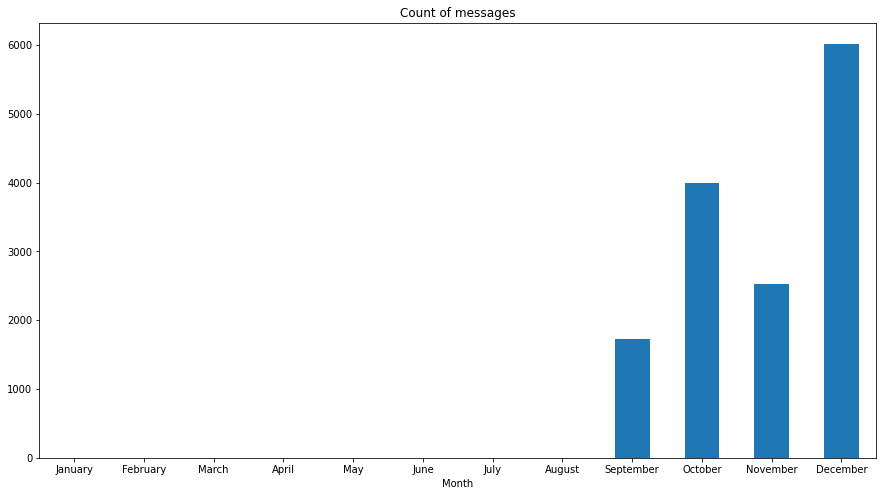

In [20]:
df['Month'] = pd.Categorical(df['Month'],
                            categories=['January','February','March','April','May','June',
                                        'July','August','September','October','November','December'],ordered=True)
df['Month'].value_counts().sort_index().plot(kind='bar', figsize=(15, 8), rot=0,title="Count of messages",
                                            xlabel='Month')
plt.savefig('Month.jpg')

### Number of messages per WeekDay

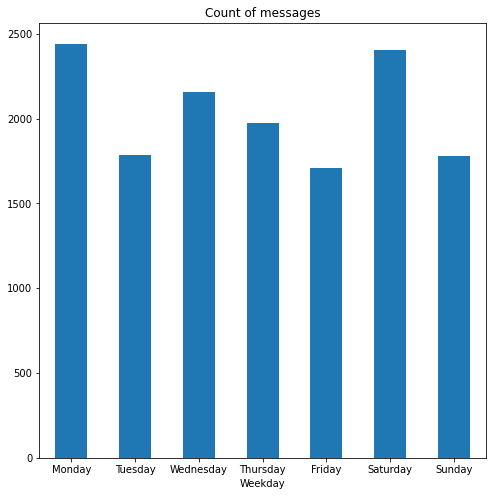

In [21]:
df['WeekDay'] = pd.Categorical(df['WeekDay'],
                            categories=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],
                            ordered=True)
df['WeekDay'].value_counts().sort_index().plot(kind='bar', figsize=(8, 8), rot=0,title="Count of messages",
                                                             xlabel='Weekday')
plt.savefig('WeekDay.jpg')

### Number of messages per Hour

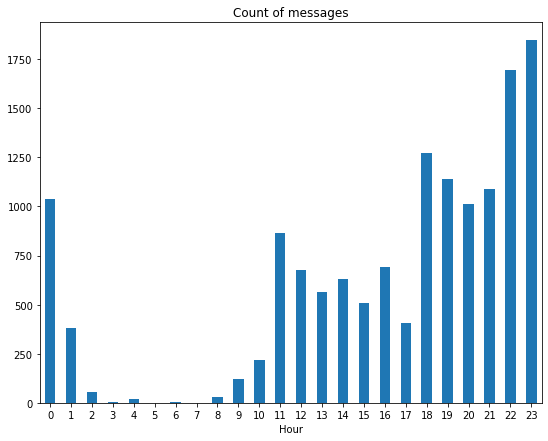

In [22]:
df['Hour'] = pd.Categorical(df['Hour'],
                           categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
                           ordered=True)
df['Hour'].value_counts().sort_index().plot(kind='bar', figsize=(9, 7), rot=0,title="Count of messages",
                                           xlabel='Hour')

plt.savefig('Hour.jpg')

### Member-wise statistics

In [23]:
df1=pd.DataFrame(df.groupby(['Sender'])[['Reactions','Photos','File','Video','Voice-message','Sticker','GIF','Link']].agg('sum'))
df2=pd.DataFrame(df.groupby(['Sender'])['Message'].agg('count'))
#Add df2 in df1
df1.insert(loc=0,column='Message',value=df2)
df1

,Message,Reactions,Photos,File,Video,Voice-message,Sticker,GIF,Link
Sender,,,,,,,,,
Adelina Avagimyan,619,107,26,0,0,2,1,0,5
Alla Hovsepyan,164,48,5,0,0,0,0,0,2
Ani Muradyan,384,94,13,0,1,0,1,1,4
Anna Sargsyan,104,40,5,0,0,0,0,0,6
Arevik Lalayan,1103,231,27,0,0,9,5,0,5
Artur Avagyan,204,108,46,0,0,0,0,0,4
Ella Mkrtchyan,952,186,50,1,0,0,2,0,4
Gurgen Hovakimyan,3529,1066,126,20,23,0,25,32,53
Izabella Arsenyan,571,128,12,0,0,0,2,0,9


### Counting messages per each member

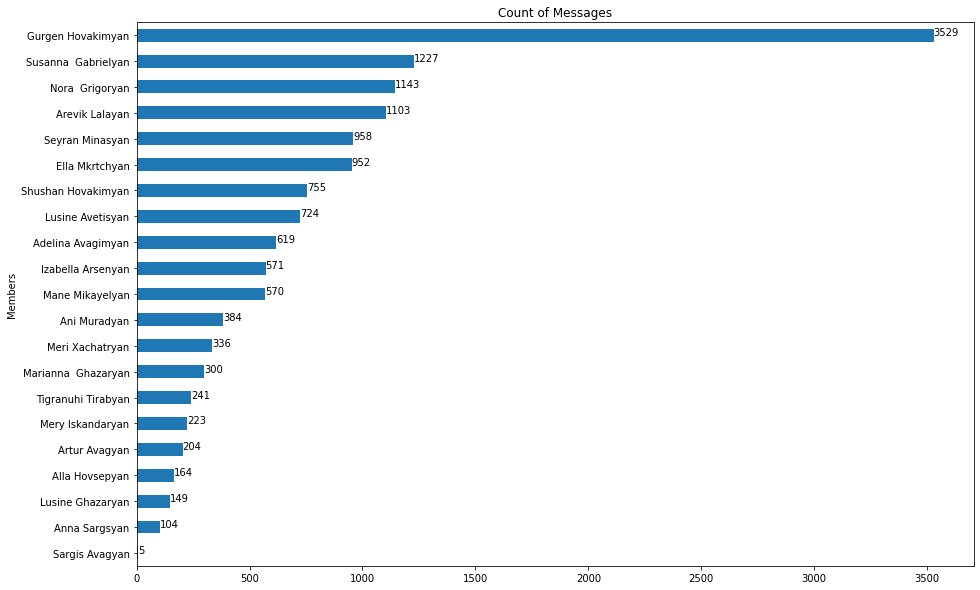

In [24]:
df['Sender'].value_counts(ascending=True).plot(kind='barh', figsize=(15, 10), rot=0,title="Count of Messages",
                                                             xlabel='Members')
for index, value in enumerate(df['Sender'].value_counts(ascending=True)):
    plt.text(value, index, str(value))
plt.savefig('mess_count.png')

### Checking who writes most messages part by part and what is the maximum sequential parts per sender

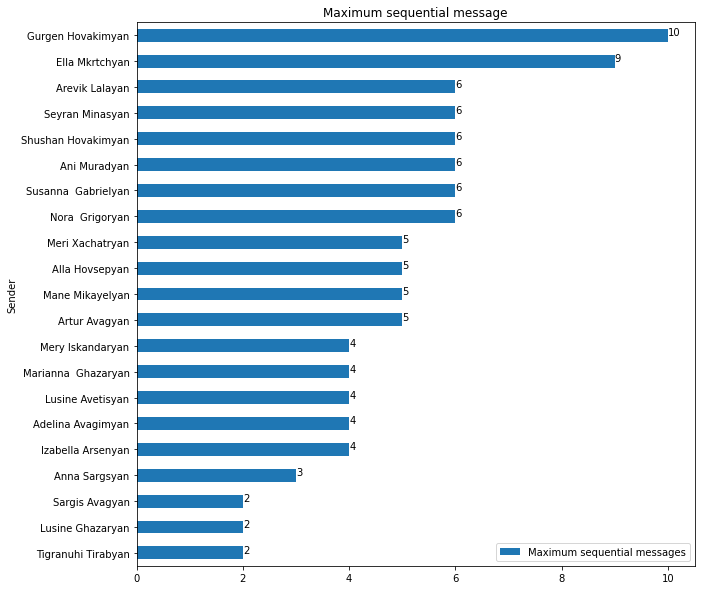

In [25]:
long_message={} #set empty dictionary
for i in range(len(df)-1):
    long_m=1
    try: #check if index is in current range
        while df['Sender'][i]==df['Sender'][i+1]:
            long_m+=1
            i+=1
        #check if the current value of long_m is bigger, than update value in dictionary  
        if df['Sender'][i] in long_message.keys():
            if long_m>=long_message[df['Sender'][i]]: 
                long_message[df['Sender'][i]]=long_m
            else:
                continue
        else:
            long_message[df['Sender'][i]]=long_m
    except:
        break
df_long_message=pd.DataFrame(dict(sorted(long_message.items(),key=lambda item: item[1],reverse=False)).items(),
                             columns=['Sender','Maximum sequential messages'])
df_long_message.plot.barh(x='Sender',y='Maximum sequential messages', rot=0,figsize=(10,10),title='Maximum sequential message')
for index, value in enumerate(df_long_message['Maximum sequential messages']):
    plt.text(value, index, str(value))
plt.savefig('long_count.png')

### Number of photos per sender

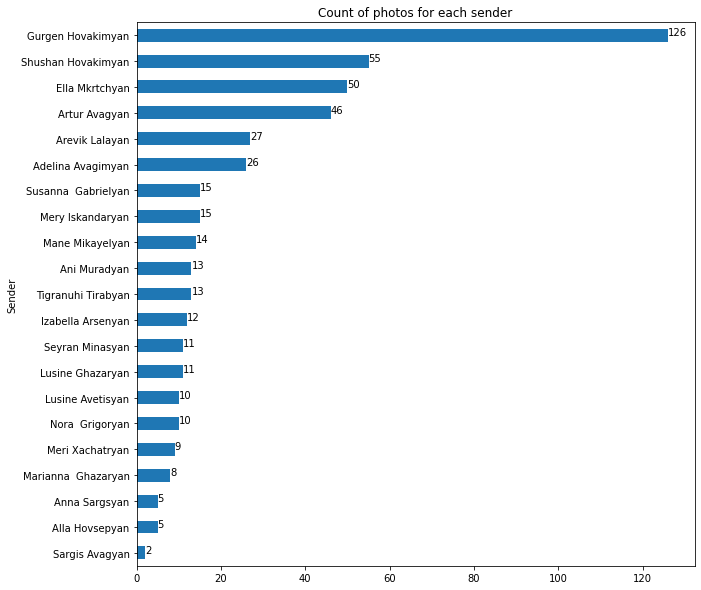

In [26]:
df_photos=df.groupby(['Sender'])['Photos'].agg('sum').sort_values(ascending=True)
df_photos.plot.barh(x='Sender',rot=0,figsize=(10,10),title='Count of photos for each sender')
for index, value in enumerate(df_photos):
    plt.text(value, index, str(value))
plt.savefig('photos_count.png')

### Number of links per sender

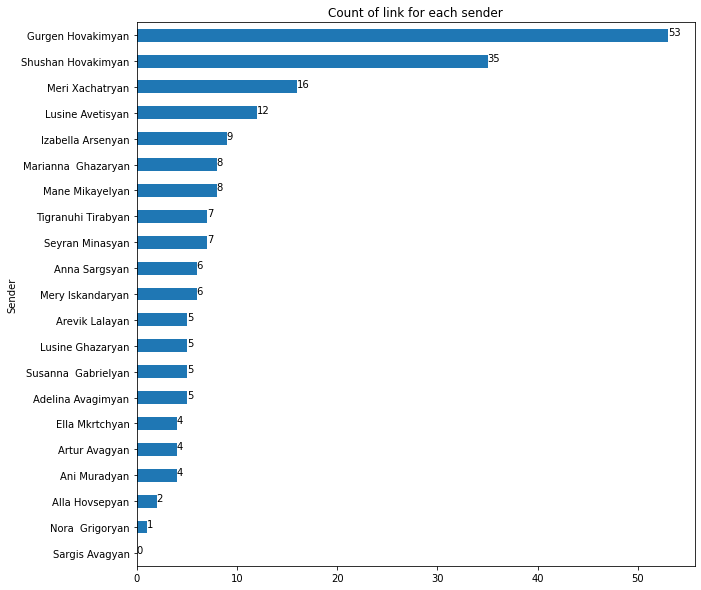

In [27]:
df_link=df.groupby(['Sender'])['Link'].agg('sum').sort_values(ascending=True)
df_link.plot.barh(x='Sender',rot=0,figsize=(10,10),title='Count of link for each sender')
for index, value in enumerate(df_link):
    plt.text(value, index, str(value))
plt.savefig('link_count.png')

# Emoji Analysis

## List of codes of the most used emojis from JSON file

In [28]:
smile=['\u00f0\u009f\u0098\u0080','\u00f0\u009f\u0098\u0083','\u00f0\u009f\u0098\u0084','\u00f0\u009f\u0098\u0081',
 '\u00f0\u009f\u0098\u0086','\u00f0\u009f\u0098\u0085','\u00f0\u009f\u0098\u0082','\u00f0\u009f\u00a4\u00a3',
 '\u00e2\u0098\u00ba\u00ef\u00b8\u008f','\u00f0\u009f\u0098\u008a','\u00f0\u009f\u0098\u0087','\u00f0\u009f\u0099\u0082',
 '\u00f0\u009f\u0099\u0083','\u00f0\u009f\u0098\u0089','\u00f0\u009f\u0098\u008d','\u00f0\u009f\u00a5\u00b0',
 '\u00f0\u009f\u0098\u0098','\u00f0\u009f\u00a4\u00a9','\u00f0\u009f\u00a5\u00b3','\u00f0\u009f\u008e\u0089',
 '\u00f0\u009f\u0098\u008e','\u00f0\u009f\u0098\u0095','\u00f0\u009f\u0098\u0092','\u00f0\u009f\u0098\u008f',
 '\u00f0\u009f\u0098\u009e','\u00e2\u0098\u00b9\u00ef\u00b8\u008f','\u00f0\u009f\u0098\u00a2','\u00f0\u009f\u00a5\u00ba',
 '\u00f0\u009f\u0098\u00ad','\u00f0\u009f\u0098\u00a1' ,'\u00f0\u009f\u0098\u00a0','\u00f0\u009f\u0091\u008d',
 '\u00e2\u009c\u008c\u00ef\u00b8\u008f','\u00f0\u009f\u0091\u008a','\u00f0\u009f\u00a4\u0099',
 '\u00f0\u009f\u00a4\u00a6\u00e2\u0080\u008d\u00e2\u0099\u0082\u00ef\u00b8\u008f',
 '\u00f0\u009f\u00a4\u00a6\u00e2\u0080\u008d\u00e2\u0099\u0080\u00ef\u00b8\u008f',
 '\u00f0\u009f\u00a4\u00b7\u00e2\u0080\u008d\u00e2\u0099\u0080\u00ef\u00b8\u008f',
 '\u00f0\u009f\u00a4\u00b7\u00e2\u0080\u008d\u00e2\u0099\u0082\u00ef\u00b8\u008f',
 '\u00f0\u009f\u008e\u0082','\u00f0\u009f\u008d\u00b0','\u00e2\u009d\u00a4\u00ef\u00b8\u008f','\u00f0\u009f\u00a7\u00a1',
 '\u00f0\u009f\u0092\u009b','\u00f0\u009f\u0092\u009a','\u00f0\u009f\u0092\u0099','\u00f0\u009f\u0092\u009c',
 '\u00f0\u009f\u00a4\u008e','\u00f0\u009f\u0096\u00a4','\u00f0\u009f\u00a4\u008d','\u00f0\u009f\u0092\u0094',
 '\u00e2\u009d\u00a3\u00ef\u00b8\u008f','\u00f0\u009f\u0092\u0095','\u00f0\u009f\u0092\u009e','\u00f0\u009f\u0092\u0093',
 '\u00e2\u009c\u0085','\u00f0\u009f\u0087\u00a6\u00f0\u009f\u0087\u00b2']
len(smile)

57

<h1 align="center">Index of emojis</h1>

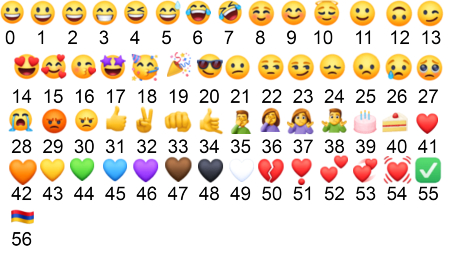

### Number of emojis per member (counted only most common emojis)

In [29]:
#create DataFrame to count emojis
df_smile=pd.DataFrame(df['Sender'].unique(),columns=['sender']) 
df_smile['count_smile']=pd.DataFrame(np.zeros(shape=(len(df_smile),1)))
count_smile_index=([0]*len(smile))
for i in range(len(df)):
    count=0 #create variable for that unique message
    for sm in range(len(smile)): # loop to find every smile from smiles' list
        count += len(re.findall(smile[sm], df['Message'][i]))
        count_smile_index[sm]+=len(re.findall(smile[sm], df['Message'][i]))
    for j in range(len(df_smile)): # loop to update counts per member
        if df_smile['sender'][j]==df['Sender'][i]:
            df_smile.count_smile[j]+=count
print("Index of most used emoji in chat is --> ",np.argmax(count_smile_index))
df_smile=df_smile.sort_values(by=['count_smile'], ascending=False,ignore_index=True)
df_smile[df_smile.count_smile>0]  # view members who used emojis

C:\Users\HOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Index of most used emoji in chat is -->  6


,sender,count_smile
0,Susanna Gabrielyan,675.0
1,Nora Grigoryan,554.0
2,Arevik Lalayan,265.0
3,Gurgen Hovakimyan,180.0
4,Seyran Minasyan,165.0
5,Ella Mkrtchyan,127.0
6,Lusine Avetisyan,113.0
7,Tigranuhi Tirabyan,108.0
8,Mery Iskandaryan,104.0
9,Shushan Hovakimyan,94.0


## Counting selected emojis per member

In [30]:
#create DataFrame to count emojis
smile_index=6
df_smile=pd.DataFrame(df['Sender'].unique(),columns=['sender']) 
df_smile['count_smile']=pd.DataFrame(np.zeros(shape=(len(df_smile),1)))
for i in range(len(df)):
    count=0 #create variable for that unique message
    count += len(re.findall(smile[smile_index], df['Message'][i])) #count selected emoji in the message
    for j in range(len(df_smile)): # loop to update counts per member
        if df_smile['sender'][j]==df['Sender'][i]:
            df_smile.count_smile[j]+=count
df_smile=df_smile.sort_values(by=['count_smile'], ascending=False,ignore_index=True)
df_smile[df_smile.count_smile>0]  # view members who used that selected emoji

C:\Users\HOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,sender,count_smile
0,Nora Grigoryan,443.0
1,Susanna Gabrielyan,231.0
2,Seyran Minasyan,133.0
3,Arevik Lalayan,131.0
4,Gurgen Hovakimyan,100.0
5,Lusine Ghazaryan,71.0
6,Ella Mkrtchyan,65.0
7,Artur Avagyan,62.0
8,Mery Iskandaryan,52.0
9,Tigranuhi Tirabyan,40.0


### How many times  did each member use laughing emojis?
#### (first 8 emojis from our list were counted)

In [31]:
#create DataFrame to count emojis
df_smile=pd.DataFrame(df['Sender'].unique(),columns=['sender']) 
df_smile['count_smile']=pd.DataFrame(np.zeros(shape=(len(df_smile),1)))
for i in range(len(df)):
    count=0 #create variable for that unique message
    for sm in range(8): # loop to find every emojis from fisrt 8 emojis
        count += len(re.findall(smile[sm], df['Message'][i]))
    for j in range(len(df_smile)): # loop to update counts per member
        if df_smile['sender'][j]==df['Sender'][i]:
            df_smile.count_smile[j]+=count
df_smile=df_smile.sort_values(by=['count_smile'], ascending=False,ignore_index=True)
df_smile[df_smile.count_smile>0]  # view members who used laughing emojis

C:\Users\HOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,sender,count_smile
0,Susanna Gabrielyan,556.0
1,Nora Grigoryan,475.0
2,Arevik Lalayan,183.0
3,Gurgen Hovakimyan,163.0
4,Seyran Minasyan,157.0
5,Ella Mkrtchyan,114.0
6,Artur Avagyan,87.0
7,Tigranuhi Tirabyan,81.0
8,Lusine Ghazaryan,71.0
9,Lusine Avetisyan,69.0


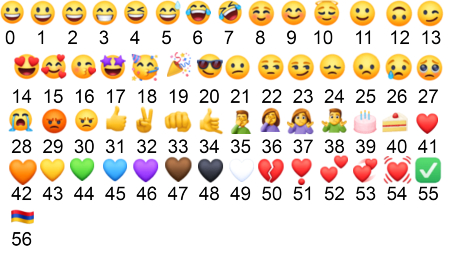
### Most used emoji (from this list) per member

In [32]:
#create DataFrame to include most used emojis' index and count
df_smile=pd.DataFrame(sorted(df['Sender'].unique()),columns=['sender']) 
df_smile['Index of most used emoji']=pd.DataFrame(np.zeros(shape=(len(df_smile),1)))
df_smile['Count of most used emoji']=pd.DataFrame(np.zeros(shape=(len(df_smile),1)))
count_matrix=np.zeros((len(df_smile),len(smile)))
for i in range(len(df)): #loop for ever message in main DataFrame
    for j in range(len(df_smile)): # loop to update counts per member
        if df_smile['sender'][j]==df['Sender'][i]:
            for sm in range(len(smile)): # loop for every emoji from list
                count_matrix[j,sm]+= len(re.findall(smile[sm], df['Message'][i])) #update values of the matrix
for i in range(len(df_smile)):
    df_smile['Index of most used emoji'][i]=count_matrix[i].argmax() #get index of most used emoji
    df_smile['Count of most used emoji'][i]=count_matrix[i,count_matrix[i].argmax()] #get count of most used emoji
df_smile[df_smile['Count of most used emoji']>0].reset_index(drop=True) #view dataframe of most used emojis

C:\Users\HOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\HOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,sender,Index of most used emoji,Count of most used emoji
0,Adelina Avagimyan,8.0,19.0
1,Alla Hovsepyan,6.0,13.0
2,Ani Muradyan,6.0,36.0
3,Anna Sargsyan,6.0,4.0
4,Arevik Lalayan,6.0,131.0
5,Artur Avagyan,6.0,62.0
6,Ella Mkrtchyan,6.0,65.0
7,Gurgen Hovakimyan,6.0,100.0
8,Izabella Arsenyan,1.0,18.0
9,Lusine Avetisyan,6.0,28.0



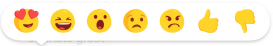
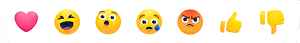
<h3 align="center">Top 7 reactions</h3>
<h3 align="left">Reactions</h3>

In [33]:
def reaction_index(text):
    '''
    Define type of reactions
    '''
    text=text.replace('\u00e2\u009d\u00a4\u00ef\u00b8\u008f','Love')
    text=text.replace('\u00e2\u009d\u00a4','Love')
    text=text.replace('\u00f0\u009f\u0098\u008d','Love')
    text=text.replace('\u00f0\u009f\u0098\u0086','HaHa')
    text=text.replace('\u00f0\u009f\u0098\u00ae','Wow')
    text=text.replace('\u00f0\u009f\u0098\u00a2','Sad')
    text=text.replace('\u00f0\u009f\u0098\u00a1','Angry')
    text=text.replace('\u00f0\u009f\u0098\u00a0','Angry')
    text=text.replace('\u00f0\u009f\u0091\u008d\u00f0\u009f\u008f\u00bb','Like')
    text=text.replace('\u00f0\u009f\u0091\u008d','Like')
    text=text.replace('\u00f0\u009f\u0091\u008e','Unlike')
    return text

### Creating DateFrame for Reactions

In [34]:
df_reactions=pd.DataFrame(columns=['Message sender','Reaction sender','Reaction type']) 
for message in json_data['messages']: #loop for messages
    if 'reactions' in message: #check if the message has reaction
        for j in message['reactions']: #koop for reactions
            if j['reaction']!=reaction_index(j['reaction']): #check if the reaction is in the top 7 reactions
                df_reactions =df_reactions.append({'Message sender': arm_eng(message['sender_name']),
                                                   'Reaction sender': arm_eng(j['actor']),
                                                   'Reaction type': reaction_index(j['reaction'])},ignore_index=True)
            else:
                df_reactions =df_reactions.append({'Message sender': arm_eng(message['sender_name']),
                                                   'Reaction sender': arm_eng(j['actor']),
                                                   'Reaction type': 'Other'},ignore_index=True)
    else:
        continue
df_reactions

,Message sender,Reaction sender,Reaction type
0,Ani Muradyan,Shushan Hovakimyan,Love
1,Anna Sargsyan,Shushan Hovakimyan,Love
2,Nora Grigoryan,Tigranuhi Tirabyan,Love
3,Nora Grigoryan,Shushan Hovakimyan,Like
4,Gurgen Hovakimyan,Shushan Hovakimyan,HaHa
...,...,...,...
4296,Shushan Hovakimyan,Gurgen Hovakimyan,Like
4297,Nora Grigoryan,Susanna Gabrielyan,HaHa
4298,Susanna Gabrielyan,Gurgen Hovakimyan,HaHa
4299,Mane Mikayelyan,Gurgen Hovakimyan,Like


### Count of reactions of each type

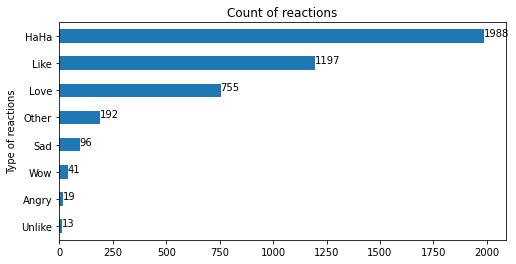

In [35]:
df_reactions['Reaction type'].value_counts(ascending=True).plot(kind='barh', figsize=(8, 4), rot=0,title="Count of reactions",
                                                             xlabel='Type of reactions')
for index, value in enumerate(df_reactions['Reaction type'].value_counts(ascending=True)):
    plt.text(value, index, str(value))
plt.savefig('Reactions__type_count.png')

### Creating DataFrame to count each reaction given to  each member

In [36]:
df_count_reactions=pd.DataFrame(sorted(df_reactions['Message sender'].unique()),columns=['Sender']) #senders' column
df_count_reactions=df_count_reactions.assign(**{'Love':0,'HaHa':0,'Wow':0,'Sad':0,
                                                'Angry':0,'Like':0,'Unlike':0,'Other':0}) # add reactions type columns
list_reaction=['Love','HaHa','Wow','Sad','Angry','Like','Unlike','Other'] #list of reaction's types
for i in range(len(df_count_reactions)): #loop for every member in main DataFrame
    for j in range(len(list_reaction)): # loop for types of reactions
        df_1=df_reactions[(df_reactions['Message sender']==df_count_reactions['Sender'][i]) &(df_reactions['Reaction type']==list_reaction[j])]
        df_count_reactions[list_reaction[j]][i]=len(df_1) # update values
df_count_reactions # view DataFrame

C:\Users\HOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Sender,Love,HaHa,Wow,Sad,Angry,Like,Unlike,Other
0,Adelina Avagimyan,46,20,3,2,0,31,0,5
1,Alla Hovsepyan,16,20,0,0,0,8,0,4
2,Ani Muradyan,30,35,0,1,0,25,1,2
3,Anna Sargsyan,18,4,0,7,1,9,0,1
4,Arevik Lalayan,45,120,1,8,0,35,0,22
5,Artur Avagyan,1,38,2,2,0,63,1,1
6,Ella Mkrtchyan,25,65,1,5,0,78,0,12
7,Gurgen Hovakimyan,65,536,19,14,3,389,4,36
8,Izabella Arsenyan,21,41,2,0,0,58,1,5
9,Lusine Avetisyan,60,117,3,8,1,67,0,9


### Creating DataFrame to count each reaction given by  each member

In [37]:
df_count_reactions=pd.DataFrame(sorted(df_reactions['Message sender'].unique()),columns=['Sender']) #senders' column
df_count_reactions=df_count_reactions.assign(**{'Love':0,'HaHa':0,'Wow':0,'Sad':0,
                                                'Angry':0,'Like':0,'Unlike':0,'Other':0}) # add reactions type columns
list_reaction=['Love','HaHa','Wow','Sad','Angry','Like','Unlike','Other'] #list of reaction's types
for i in range(len(df_count_reactions)): #loop for every member in main DataFrame
    for j in range(len(list_reaction)): # loop for types of reactions
        df_1=df_reactions[(df_reactions['Reaction sender']==df_count_reactions['Sender'][i]) &(df_reactions['Reaction type']==list_reaction[j])]
        df_count_reactions[list_reaction[j]][i]=len(df_1) # update values
df_count_reactions # view DataFrame

C:\Users\HOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Sender,Love,HaHa,Wow,Sad,Angry,Like,Unlike,Other
0,Adelina Avagimyan,47,64,7,9,1,141,3,7
1,Alla Hovsepyan,19,42,1,6,0,28,0,0
2,Ani Muradyan,19,25,0,4,0,48,0,4
3,Anna Sargsyan,34,42,2,7,0,38,0,0
4,Arevik Lalayan,74,141,6,15,7,159,0,6
5,Artur Avagyan,0,2,0,0,0,19,0,8
6,Ella Mkrtchyan,15,46,1,0,0,23,0,7
7,Gurgen Hovakimyan,13,42,1,4,1,61,5,14
8,Izabella Arsenyan,8,58,1,4,2,62,0,0
9,Lusine Avetisyan,73,164,7,5,2,69,0,4


### Whom most reacted every member (by types of reactions) vs Reactions for each member by other members and by types of rections, in a word "Who reated whom and by what"

In [38]:
df_count_reactions=pd.DataFrame(sorted(df_reactions['Message sender'].unique()),columns=['Sender']) #senders' column
df_count_reactions=df_count_reactions.assign(**{'Love':'-','HaHa':'-','Wow':'-','Sad':'-',
                                                'Angry':'-','Like':'-','Unlike':'-','Other':'-'}) # add reactions type columns
list_reaction=['Love','HaHa','Wow','Sad','Angry','Like','Unlike','Other'] #list of reaction's types
for i in range(len(df_count_reactions)): #loop for every member in main DataFrame
    for j in range(len(list_reaction)): # loop for types of reactions
        try: #to escape of 0 index
            df_1=df_reactions[(df_reactions['Reaction sender']==df_count_reactions['Sender'][i]) &
                              (df_reactions['Reaction type']==list_reaction[j])] # Filter rows by Message sender and Reaction type 
            df_count_reactions[list_reaction[j]][i]=df_1['Message sender'].value_counts().index[0] # update values
        except IndexError:
            continue
df_count_reactions # view DataFrame

,Sender,Love,HaHa,Wow,Sad,Angry,Like,Unlike,Other
0,Adelina Avagimyan,Arevik Lalayan,Arevik Lalayan,Gurgen Hovakimyan,Susanna Gabrielyan,Gurgen Hovakimyan,Gurgen Hovakimyan,Ani Muradyan,Seyran Minasyan
1,Alla Hovsepyan,Gurgen Hovakimyan,Gurgen Hovakimyan,Susanna Gabrielyan,Seyran Minasyan,-,Gurgen Hovakimyan,-,-
2,Ani Muradyan,Gurgen Hovakimyan,Gurgen Hovakimyan,-,Anna Sargsyan,-,Gurgen Hovakimyan,-,Susanna Gabrielyan
3,Anna Sargsyan,Lusine Avetisyan,Gurgen Hovakimyan,Adelina Avagimyan,Mane Mikayelyan,-,Gurgen Hovakimyan,-,-
4,Arevik Lalayan,Susanna Gabrielyan,Gurgen Hovakimyan,Gurgen Hovakimyan,Susanna Gabrielyan,Lusine Avetisyan,Gurgen Hovakimyan,-,Adelina Avagimyan
5,Artur Avagyan,-,Susanna Gabrielyan,-,-,-,Shushan Hovakimyan,-,Seyran Minasyan
6,Ella Mkrtchyan,Shushan Hovakimyan,Susanna Gabrielyan,Izabella Arsenyan,-,-,Nora Grigoryan,-,Susanna Gabrielyan
7,Gurgen Hovakimyan,Susanna Gabrielyan,Seyran Minasyan,Adelina Avagimyan,Seyran Minasyan,Mane Mikayelyan,Ella Mkrtchyan,Susanna Gabrielyan,Susanna Gabrielyan
8,Izabella Arsenyan,Marianna Ghazaryan,Gurgen Hovakimyan,Gurgen Hovakimyan,Tigranuhi Tirabyan,Mane Mikayelyan,Gurgen Hovakimyan,-,-
9,Lusine Avetisyan,Susanna Gabrielyan,Gurgen Hovakimyan,Gurgen Hovakimyan,Gurgen Hovakimyan,Tigranuhi Tirabyan,Gurgen Hovakimyan,-,Susanna Gabrielyan


### Who most reacted to each member (by types of reactions)

In [39]:
df_count_reactions=pd.DataFrame(sorted(df_reactions['Message sender'].unique()),columns=['Sender']) #senders' column
df_count_reactions=df_count_reactions.assign(**{'Love':'-','HaHa':'-','Wow':'-','Sad':'-',
                                                'Angry':'-','Like':'-','Unlike':'-','Other':'-'}) # add reactions type columns
list_reaction=['Love','HaHa','Wow','Sad','Angry','Like','Unlike','Other'] #list of reaction's types
for i in range(len(df_count_reactions)): #loop for every member in main DataFrame
    for j in range(len(list_reaction)): # loop for types of reactions
        try: #to escape of 0 index
            df_1=df_reactions[(df_reactions['Message sender']==df_count_reactions['Sender'][i]) &
                              (df_reactions['Reaction type']==list_reaction[j])] # Filter rows by Message sender and Reaction type 
            df_count_reactions[list_reaction[j]][i]=df_1['Reaction sender'].value_counts().index[0] # update values
        except IndexError:
            continue
df_count_reactions # view DataFrame

,Sender,Love,HaHa,Wow,Sad,Angry,Like,Unlike,Other
0,Adelina Avagimyan,Tigranuhi Tirabyan,Arevik Lalayan,Arevik Lalayan,Izabella Arsenyan,-,Arevik Lalayan,-,Arevik Lalayan
1,Alla Hovsepyan,Marianna Ghazaryan,Mery Iskandaryan,-,-,-,Arevik Lalayan,-,Susanna Gabrielyan
2,Ani Muradyan,Shushan Hovakimyan,Shushan Hovakimyan,-,Adelina Avagimyan,-,Arevik Lalayan,Adelina Avagimyan,Shushan Hovakimyan
3,Anna Sargsyan,Susanna Gabrielyan,Shushan Hovakimyan,-,Arevik Lalayan,Arevik Lalayan,Adelina Avagimyan,-,Susanna Gabrielyan
4,Arevik Lalayan,Adelina Avagimyan,Marianna Ghazaryan,Lusine Avetisyan,Anna Sargsyan,-,Adelina Avagimyan,-,Susanna Gabrielyan
5,Artur Avagyan,Lusine Avetisyan,Lusine Ghazaryan,Mane Mikayelyan,Shushan Hovakimyan,-,Shushan Hovakimyan,Gurgen Hovakimyan,Susanna Gabrielyan
6,Ella Mkrtchyan,Adelina Avagimyan,Tigranuhi Tirabyan,Adelina Avagimyan,Nora Grigoryan,-,Gurgen Hovakimyan,-,Susanna Gabrielyan
7,Gurgen Hovakimyan,Susanna Gabrielyan,Shushan Hovakimyan,Shushan Hovakimyan,Shushan Hovakimyan,Arevik Lalayan,Shushan Hovakimyan,Nora Grigoryan,Susanna Gabrielyan
8,Izabella Arsenyan,Marianna Ghazaryan,Shushan Hovakimyan,Arevik Lalayan,-,-,Shushan Hovakimyan,Adelina Avagimyan,Susanna Gabrielyan
9,Lusine Avetisyan,Susanna Gabrielyan,Marianna Ghazaryan,Susanna Gabrielyan,Tigranuhi Tirabyan,Arevik Lalayan,Arevik Lalayan,-,Susanna Gabrielyan



### Number of specific type of reaction given by the member per other members

#### You must input type of reaction and name of member
##### Type of smile can be one of this list ['Love', 'HaHa', 'Wow', 'Sad', 'Angry', 'Like', 'Unlike', 'Other']

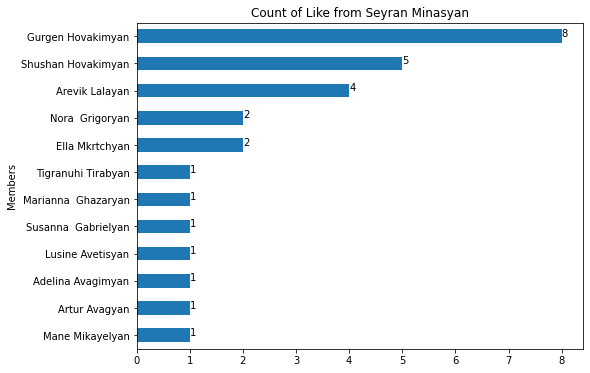

In [50]:
type_smile='Like' #input type of reaction
member=random.choice(df_reactions['Reaction sender'].unique())
#member='Artur Avagyan' #also can input name of reaction sender
member_smile_df=df_reactions[(df_reactions['Reaction sender']==member) & 
                             (df_reactions['Reaction type']==type_smile)] #filter dataframe by reaction sender and reaction type
member_smile_df['Message sender'].value_counts(ascending=True).plot(kind='barh', figsize=(8, 6), rot=0,title="Count of "+type_smile+' from '+member,
                                    xlabel='Members') 
for index, value in enumerate(member_smile_df['Message sender'].value_counts(ascending=True)):
    plt.text(value, index, str(value))


### Number of specific type of reaction given to the member by other members

#### You must input type of reaction and name of member
##### Type of smile can be one of this list ['Love', 'HaHa', 'Wow', 'Sad', 'Angry', 'Like', 'Unlike', 'Other']

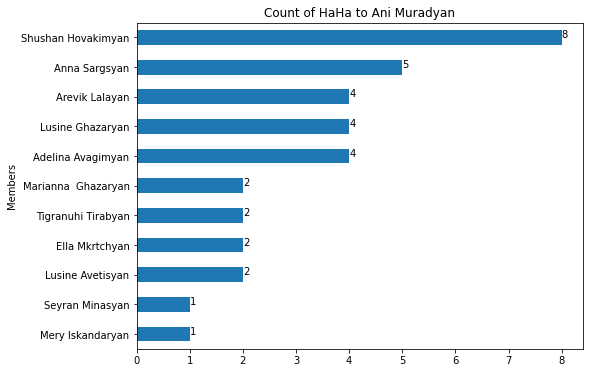

In [45]:
type_smile='HaHa' #input type of reaction
member=random.choice(df_reactions['Message sender'].unique())
#member='Tigranuhi Tirabyan' #alos can input name of message sender
member_smile_df=df_reactions[(df_reactions['Message sender']==member) & 
                             (df_reactions['Reaction type']==type_smile)] #filter dataframe by message sender and reaction type
member_smile_df['Reaction sender'].value_counts(ascending=True).plot(kind='barh', figsize=(8, 6), rot=0,title="Count of "+type_smile+' to '+member,
                                    xlabel='Members') 
for index, value in enumerate(member_smile_df['Reaction sender'].value_counts(ascending=True)):
    plt.text(value, index, str(value))

## Text analysis

In [42]:
def clean_text(text):
    smile=['\u00f0\u009f\u0098\u0080','\u00f0\u009f\u0098\u0083','\u00f0\u009f\u0098\u0084','\u00f0\u009f\u0098\u0081',
 '\u00f0\u009f\u0098\u0086','\u00f0\u009f\u0098\u0085','\u00f0\u009f\u0098\u0082','\u00f0\u009f\u00a4\u00a3',
 '\u00e2\u0098\u00ba\u00ef\u00b8\u008f','\u00f0\u009f\u0098\u008a','\u00f0\u009f\u0098\u0087','\u00f0\u009f\u0099\u0082',
 '\u00f0\u009f\u0099\u0083','\u00f0\u009f\u0098\u0089','\u00f0\u009f\u0098\u008d','\u00f0\u009f\u00a5\u00b0',
 '\u00f0\u009f\u0098\u0098','\u00f0\u009f\u00a4\u00a9','\u00f0\u009f\u00a5\u00b3','\u00f0\u009f\u008e\u0089',
 '\u00f0\u009f\u0098\u008e','\u00f0\u009f\u0098\u0095','\u00f0\u009f\u0098\u0092','\u00f0\u009f\u0098\u008f',
 '\u00f0\u009f\u0098\u009e','\u00e2\u0098\u00b9\u00ef\u00b8\u008f','\u00f0\u009f\u0098\u00a2','\u00f0\u009f\u00a5\u00ba',
 '\u00f0\u009f\u0098\u00ad','\u00f0\u009f\u0098\u00a1' ,'\u00f0\u009f\u0098\u00a0','\u00f0\u009f\u0091\u008d',
 '\u00e2\u009c\u008c\u00ef\u00b8\u008f','\u00f0\u009f\u0091\u008a','\u00f0\u009f\u00a4\u0099',
 '\u00f0\u009f\u00a4\u00a6\u00e2\u0080\u008d\u00e2\u0099\u0082\u00ef\u00b8\u008f',
 '\u00f0\u009f\u00a4\u00a6\u00e2\u0080\u008d\u00e2\u0099\u0080\u00ef\u00b8\u008f',
 '\u00f0\u009f\u00a4\u00b7\u00e2\u0080\u008d\u00e2\u0099\u0080\u00ef\u00b8\u008f',
 '\u00f0\u009f\u00a4\u00b7\u00e2\u0080\u008d\u00e2\u0099\u0082\u00ef\u00b8\u008f',
 '\u00f0\u009f\u008e\u0082','\u00f0\u009f\u008d\u00b0','\u00e2\u009d\u00a4\u00ef\u00b8\u008f','\u00f0\u009f\u00a7\u00a1',
 '\u00f0\u009f\u0092\u009b','\u00f0\u009f\u0092\u009a','\u00f0\u009f\u0092\u0099','\u00f0\u009f\u0092\u009c',
 '\u00f0\u009f\u00a4\u008e','\u00f0\u009f\u0096\u00a4','\u00f0\u009f\u00a4\u008d','\u00f0\u009f\u0092\u0094',
 '\u00e2\u009d\u00a3\u00ef\u00b8\u008f','\u00f0\u009f\u0092\u0095','\u00f0\u009f\u0092\u009e','\u00f0\u009f\u0092\u0093',
 '\u00e2\u009c\u0085','\u00f0\u009f\u0087\u00a6\u00f0\u009f\u0087\u00b2']
    for sm in smile:
        if sm in text:
            text=re.sub(sm, '', text)
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text=re.split(' ',text)
    return text

### Create DataFrame for counting most used word(which consists of more than 4 letters) for each member

In [43]:
senders=sorted(df['Sender'].unique()) # select members of chat
data_text=pd.DataFrame(columns=['Message sender','Most used word']) # create DataFrame
data_text['Message sender']=senders #column for members
data_text['Most used word']='' #empty column, then it will be most used word per members
for i in range(len(data_text)): # loop for dataframe
    sender_text=[] #empty list for word
    df_member=df[df['Sender']==data_text['Message sender'][i]].reset_index() #filter main Dataframe by Message sender
    for j in range(len(df_member)): #loop for that filter dataframe
        for h in clean_text(df_member['Message'][j]): #loop for words
            if len(h)>4: # check if word consist more than 4 letters
                sender_text.append(h) #append word to list
    try: #exception for index 0
        data_text['Most used word'][i]=pd.Series(sender_text).value_counts().index[0]
    except IndexError:
        data_text['Most used word'][i]=''
data_text #view data frame

C:\Users\HOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  del sys.path[0]


,Message sender,Most used word
0,Adelina Avagimyan,erexeq
1,Alla Hovsepyan,erexeq
2,Ani Muradyan,erexeq
3,Anna Sargsyan,aveli
4,Arevik Lalayan,erexeq
5,Artur Avagyan,orinak
6,Ella Mkrtchyan,erexeq
7,Gurgen Hovakimyan,hamar
8,Izabella Arsenyan,erexeq
9,Lusine Avetisyan,erexeq


## Best Reagards
<h4 align="left">Artur Avagyan</h4>
<ul>
    <li>E-mail: avagyan.artur97@gmail.com</li>
    <li>Phone: +37498641815</li>
</ul>

<h4 align="left">Tigranuhi Tirabyan</h4>
<ul>
    <li>E-mail: tirabyan0599@gmail.com</li>
    <li>Phone: +37477746434</li>
</ul>
